This notebook needs:


*   data_loader.py
*   model.py
*   normalisation_layers.py



In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [2]:
model_path = r"/content/gdrive/MyDrive/EVA5/S6AssignmentSolution/GBN.pth"

In [4]:
import torch
from model import Net

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
use_ghost_batch_norm = True
batch_size = 4096
virtual_batch_size = 32
pred_model = Net(use_gbn_flag= use_ghost_batch_norm, virtual_batch_size=virtual_batch_size).to(device)
pred_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [5]:
from data_loader import get_train_test_data_loaders
_, test_loader = get_train_test_data_loaders(random_seed=1,batch_size =batch_size)

CUDA Available? True


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
with torch.no_grad():
  for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = pred_model(data)
    pred = output.argmax(dim=1, keepdim=True)
    break

In [7]:
matches = [x.item() for x in pred.eq(target.view_as(pred)).squeeze()]
count =0
match_indices = []
for i,match in enumerate(matches):
  if match == False:
    match_indices.append(i)
    count+=1
    if count>=25:
      break

In [8]:
match_indices

[184,
 247,
 259,
 290,
 326,
 435,
 445,
 448,
 449,
 490,
 542,
 552,
 582,
 646,
 674,
 684,
 707,
 717,
 726,
 740,
 882,
 938,
 951,
 965,
 1014]

In [9]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
root_path = r"/content/gdrive/MyDrive/EVA5/S6AssignmentSolution"

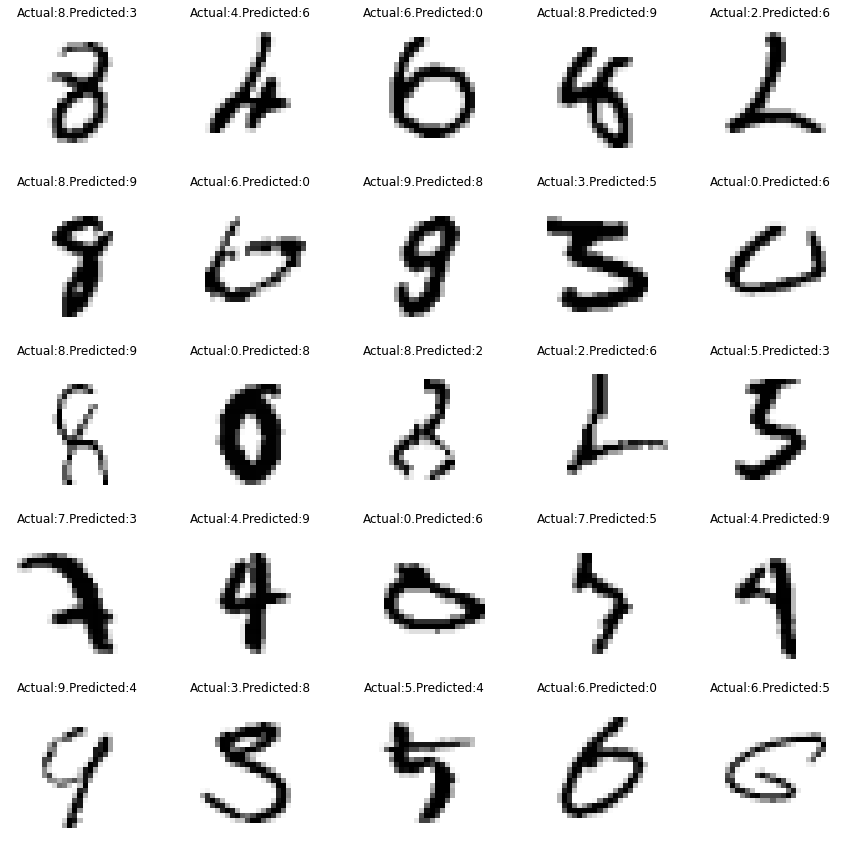

In [13]:
figure = plt.figure(figsize=(15,15))
for i,match_index in enumerate(match_indices):
  plt.subplot(5, 5, i+1)
  plt.axis('off')
  plt.title(f"Actual:{target[match_index].item()}.Predicted:{pred[match_index].item()}")
  plt.imshow(images[match_index].numpy().squeeze(), cmap='gray_r')

plt.savefig(f'{root_path}/misclassified_images.png')